# Pablo Escobar
## 20936
## lab 4

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import linear_regression, norm, sigmoid, cost, grad

## Task 1.1: Leer el csv y almacenarlo en un np.array para ser trabajado en el notebook.


In [4]:
# Abriendo el csv.
csvValues = np.genfromtxt('framingham.csv', delimiter=',')
csvValues = csvValues[1:, :]

# Task 1.2: Ajustar un modelo logístico polinomial en base al juego de datos cargado de forma matricial que relaciona las variables independientes que usted considere apropiadas (puede no utilizar todas las componentes de X), con la variable dependiente de salida (sufre o no sufre un paro cardíaco).

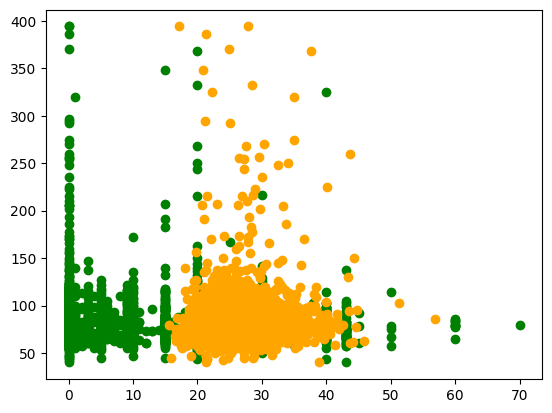

In [5]:
# Fuma o no.
X = csvValues[:,4]
# paro cardíaco.
y = csvValues[:,14]
# Heartrate.
x = csvValues[:,12]
# paro cardíaco.
y = csvValues[:,14]
# graph.
plt.scatter(X, y, color="green")
plt.scatter(x, y, color="orange")
plt.show()



# Task 1.3: Utilice la implementación vectorial del algoritmo de regresión logística (descenso del gradiente visto en clase)

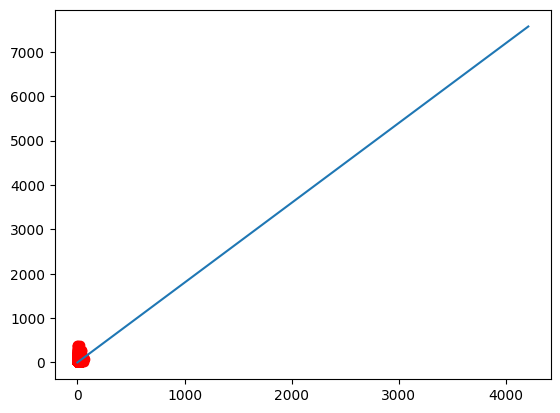

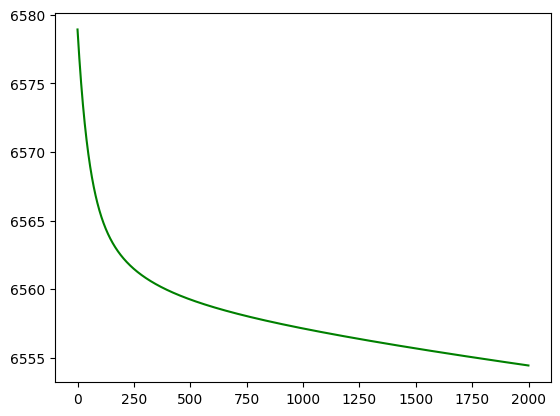

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))

Xr = np.hstack((np.ones_like(X), X))
t0 = np.random.rand(Xr.shape[1], 1)
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0,cost,grad, a=0.000001, n=2000 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
ym = xmr @ tf
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()

# 1.4: Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

# grado 1

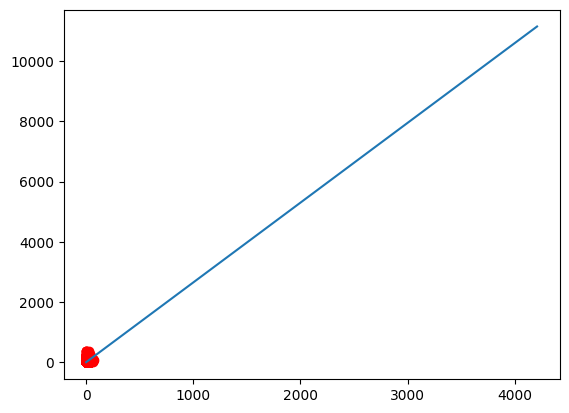

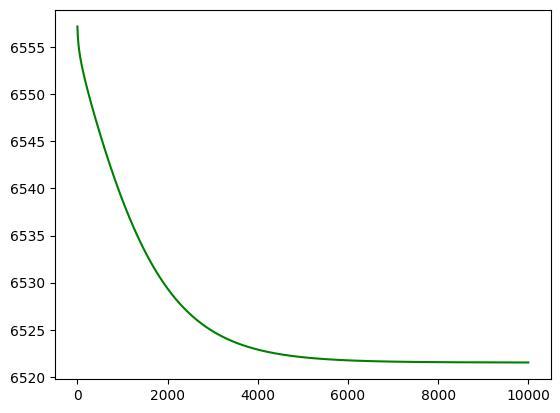

In [7]:

# X and y are the input and output variables, respectively.
X = csvValues[:,4]
y = csvValues[:,14]

# Remove any NaN values from X and y
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Reshape X and y to be 2D arrays
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# Pad the input array with zeros, if necessary
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))

# Add polynomial features to X
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 1 ))

# Initialize the weights
t0 = np.random.rand(Xr.shape[1], 1)
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))

# Perform linear regression
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.00001, n=10000 )

# Make predictions
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 1 ))
ym = xmr @ tf 

# Plot the results
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()

# grado 2

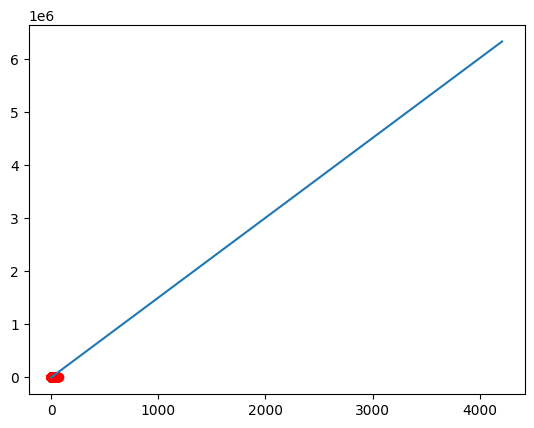

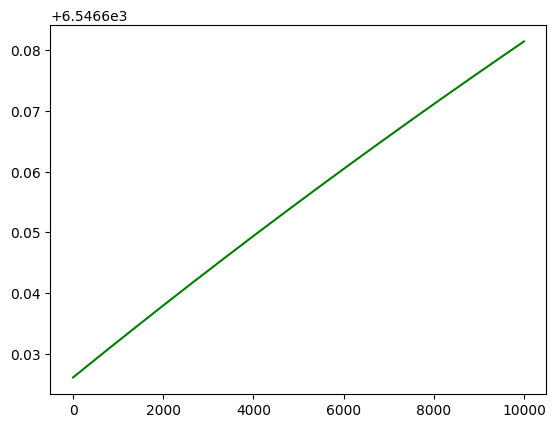

In [8]:
# X is the input data, y is the output data. 
X = csvValues[:,4]
y = csvValues[:,14]

# Remove rows with NaN values in either X or y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Reshape X and y into column vectors.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# If X has more elements than y, append zeros to y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))

# If y has more elements than X, append zeros to X.
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))

# Append 1s to the left side of X, and append X^2 to the right side of X.
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 2 ))

# Initialize the theta vector to random values.
t0 = np.random.rand(Xr.shape[1], 1) 
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))

# Run linear regression.
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.0000000001, n=10000 )

# Generate the x and y values for the line of best fit.
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 2 ))
ym = xmr @ tf 

# Plot the points and the line of best fit.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Plot the costs.
plt.plot(costs, color="green")
plt.show()

# Polinomio grado 3

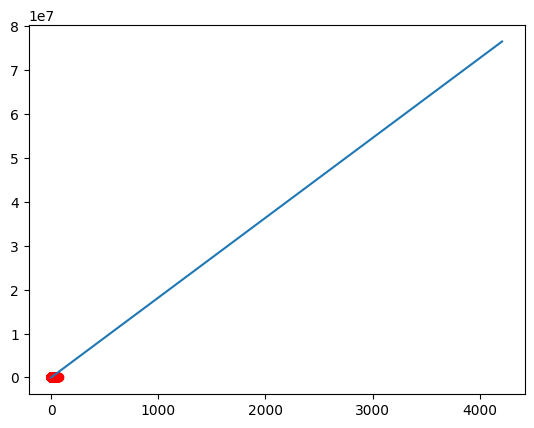

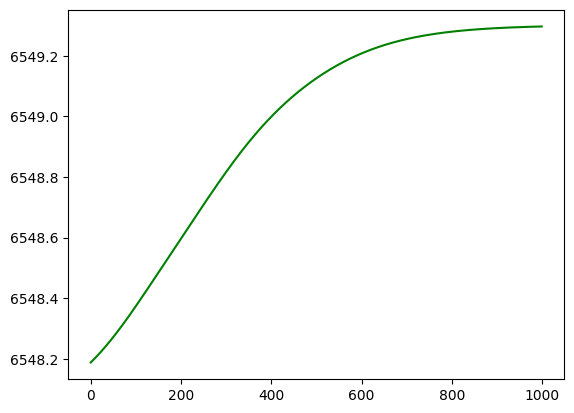

In [9]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
    
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 3 ))
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.
to = to[~np.isnan(to)]
to = to.reshape((len(to), 1))
tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.00000000001, n=1000 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 3 ))
ym = xmr @ tf 
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()

# Polinomio grado 4

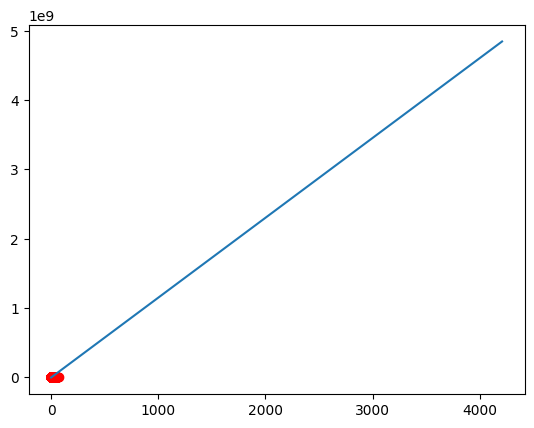

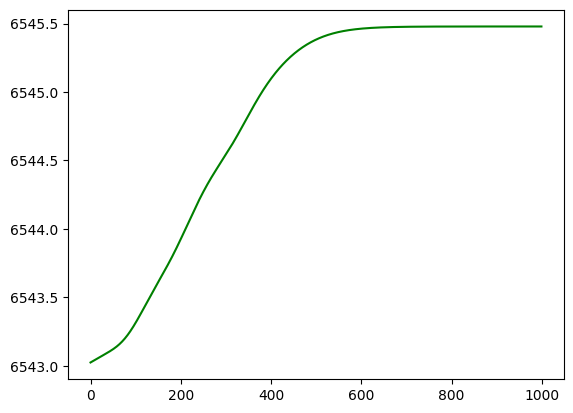

In [10]:

X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 4 ))
t0 = np.random.rand(Xr.shape[1], 1) 
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.00000000000001, n=1000 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 4 ))
ym = xmr @ tf 
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()


# Polinomio grado 5

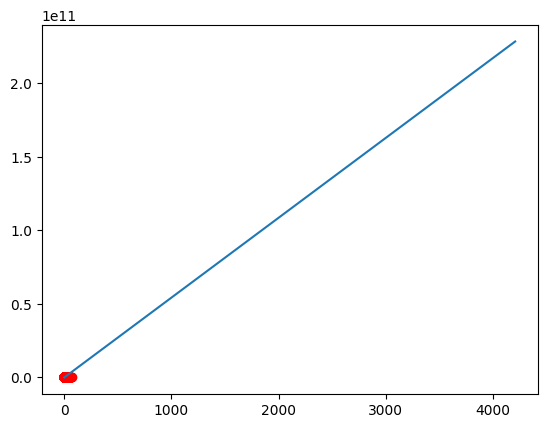

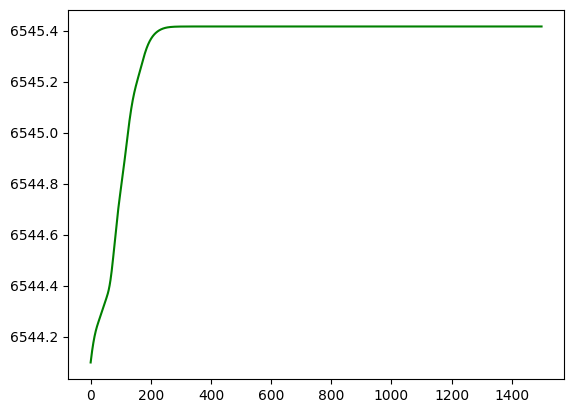

In [11]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 5 ))
t0 = np.random.rand(Xr.shape[1], 1)
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.00000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 5 ))
ym = xmr @ tf
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()

# Polinomio grado 6

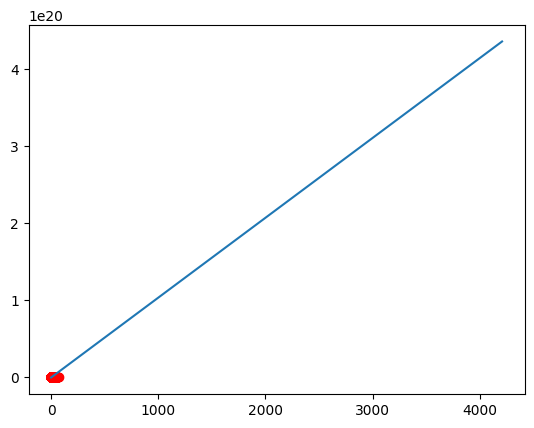

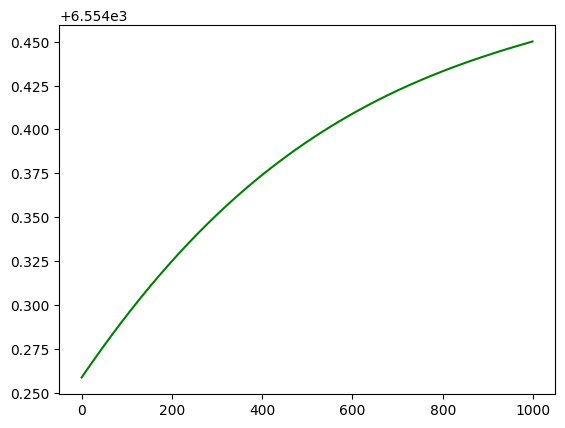

In [12]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 6 ))
t0 = np.random.rand(Xr.shape[1], 1)
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))

tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.0000000000000000000001, n=1000 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))

xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 6 ))
ym = xmr @ tf 
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 7

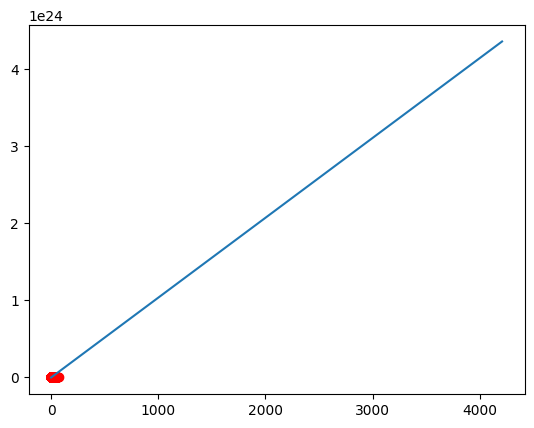

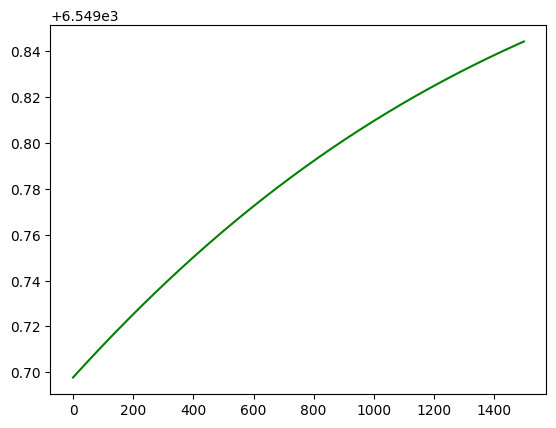

In [13]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))


if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
    
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 7 ))
t0 = np.random.rand(Xr.shape[1], 1) 
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.00000000000000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 7 ))
ym = xmr @ tf 
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 8

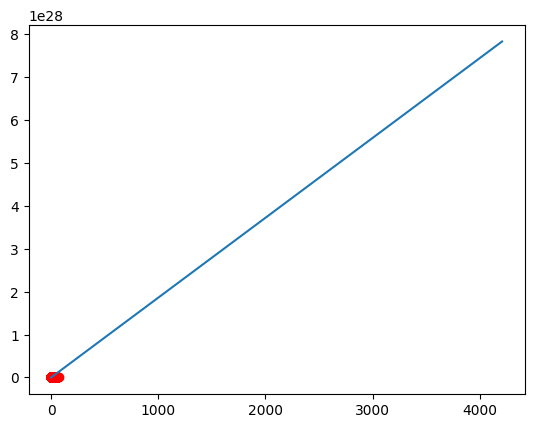

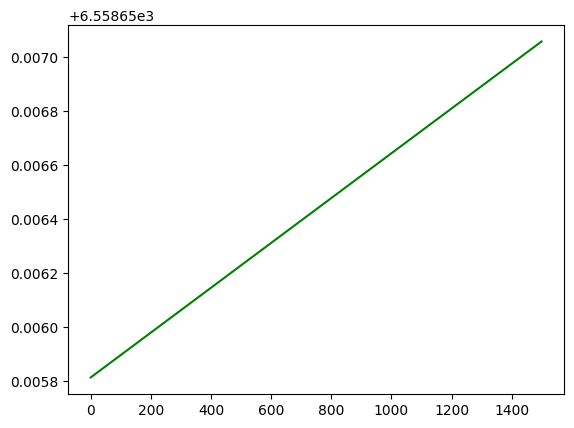

In [14]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 8 ))
t0 = np.random.rand(Xr.shape[1], 1) 
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.00000000000000000000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 8 ))
ym = xmr @ tf
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 9

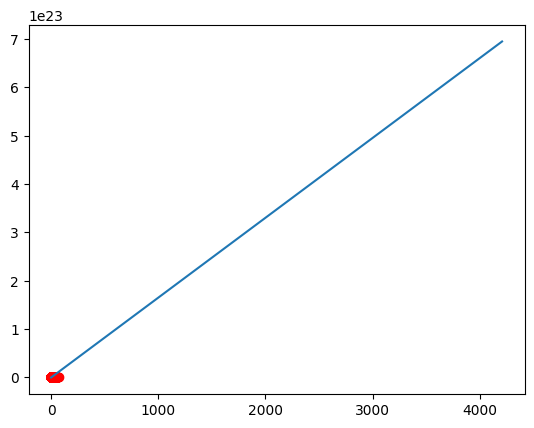

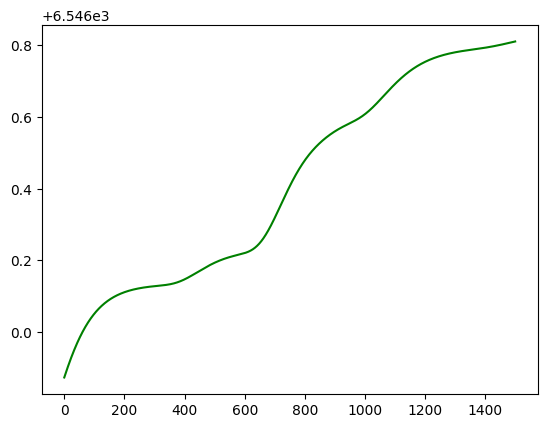

In [15]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 9 ))
t0 = np.random.rand(Xr.shape[1], 1) # Theta inicial.
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.00000000000000000000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 9 ))
ym = xmr @ tf 
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 10

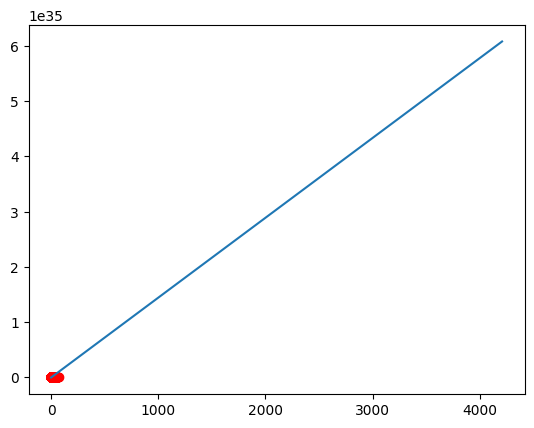

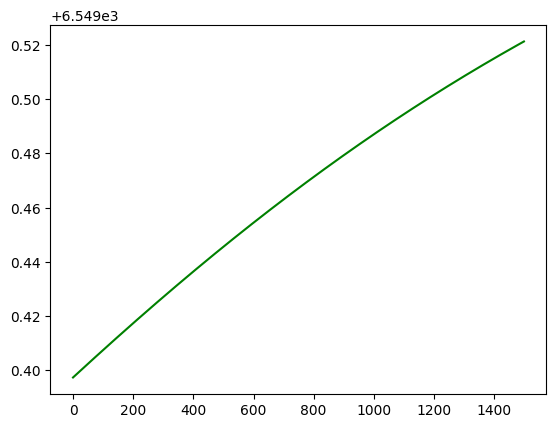

In [16]:

X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 10 ))
to = np.random.rand(Xr.shape[1], 1) 
to = to[~np.isnan(to)]
to = to.reshape((len(to), 1))
tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.0000000000000000000000000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 10 ))
ym = xmr @ tf
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 11

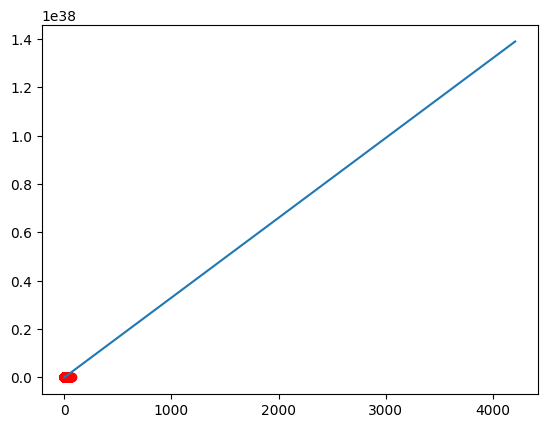

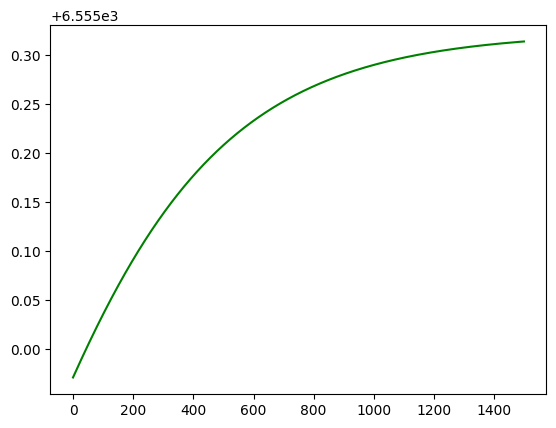

In [17]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 11 ))
t0 = np.random.rand(Xr.shape[1], 1) 
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.0000000000000000000000000000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 11 ))
ym = xmr @ tf 
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 12

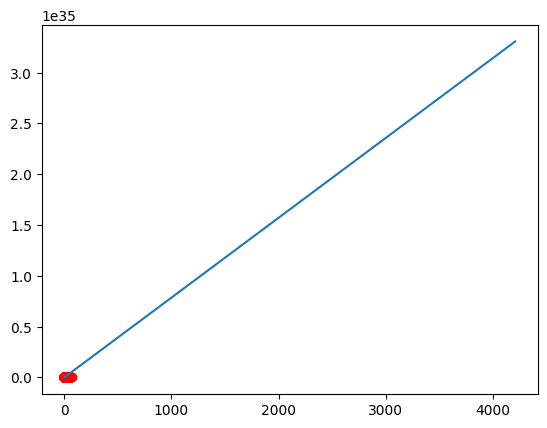

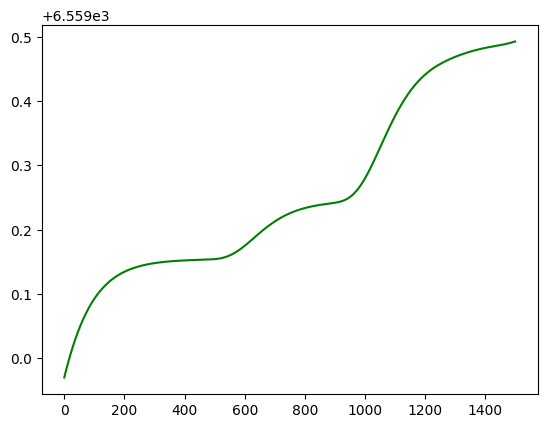

In [18]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 12 ))
t0 = np.random.rand(Xr.shape[1], 1) 
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.0000000000000000000000000000000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 12 ))
ym = xmr @ tf 
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()

# Polinomio de grado 13

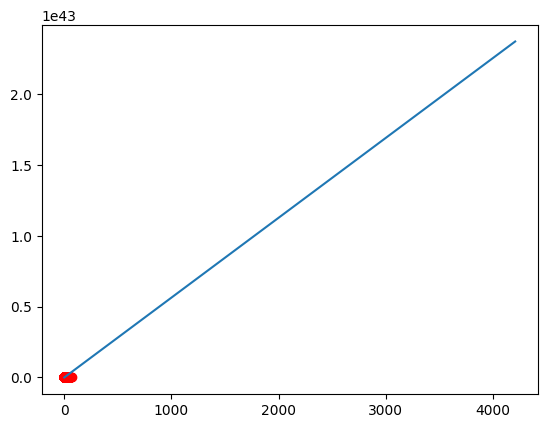

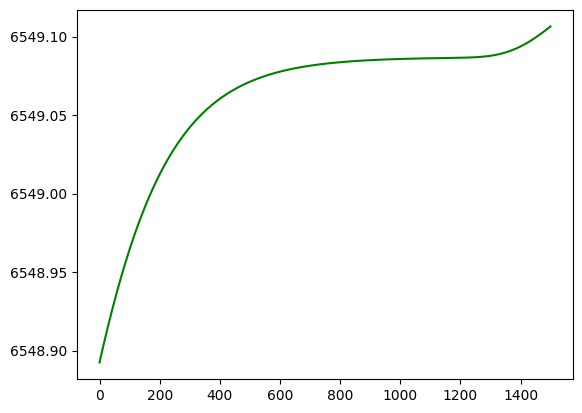

In [19]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 13 ))
t0 = np.random.rand(Xr.shape[1], 1) 
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.00000000000000000000000000000000000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 13 ))
ym = xmr @ tf 
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 14

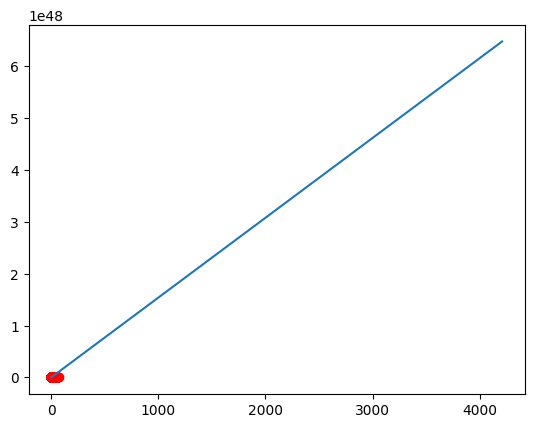

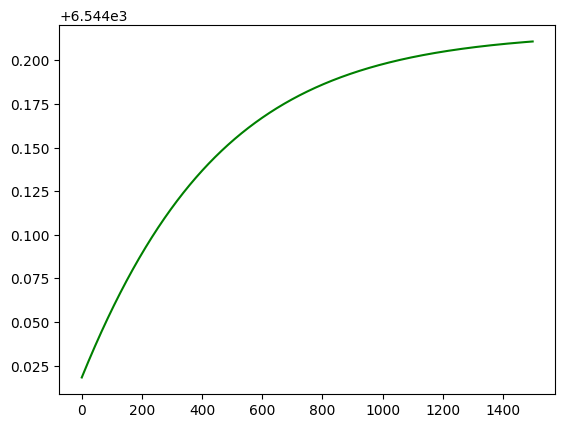

In [20]:
X = csvValues[:,4]
y = csvValues[:,14]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))
Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 14 ))
t0 = np.random.rand(Xr.shape[1], 1)
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs = linear_regression( Xr, y, t0, cost, grad, a=0.000000000000000000000000000000000000000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 14 ))
ym = xmr @ tf
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 15

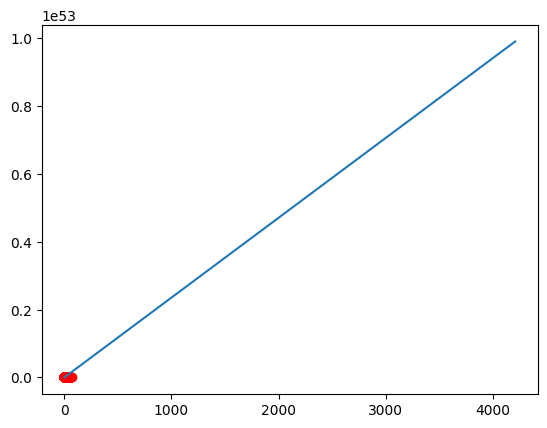

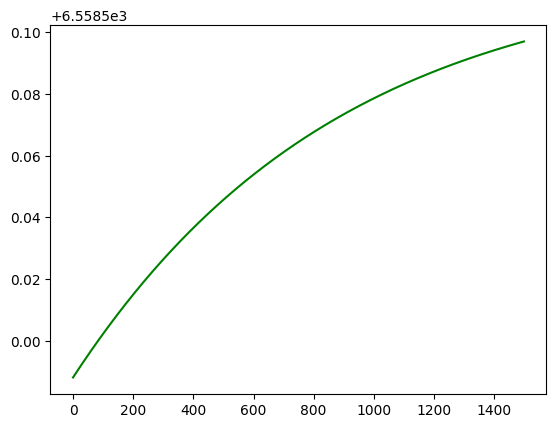

In [21]:
X = csvValues[:,4]

y = csvValues[:,14]

X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))

Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 15 ))
t0 = np.random.rand(Xr.shape[1], 1)
t0 = t0[~np.isnan(t0)]
t0 = t0.reshape((len(t0), 1))
tf, costs =linear_regression( Xr, y, t0, cost, grad, a=0.0000000000000000000000000000000000000000000000000000001, n=1500 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 15 ))
ym = xmr @ tf
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="green")
plt.show()


# 1.5: Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).


##### A lo largo del desarrollo de este laboratorio, se ha constatado una sólida relación entre las variables que denotan el hábito de tabaquismo del paciente y la incidencia de infartos. Asimismo, se ha observado que los datos relacionados con la condición cardíaca del paciente ofrecen información relevante acerca de la presencia de infartos a lo largo de su vida. Por otra parte, se ha evidenciado que el grado polinomial óptimo para describir el conjunto de puntos es de uno. En consecuencia, se puede afirmar que una recta sería una representación adecuada para los datos del conjunto, facilitando así su análisis en futuras investigaciones.